# Part I - Ford GoBike System Data

## Introduction
> Introduce the dataset: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#load dataset
ford_gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
ford_gobike.duplicated().sum()

0

In [5]:
#change datatype of start and end time
ford_gobike['start_time'] = pd.to_datetime(ford_gobike['start_time'])
ford_gobike['end_time'] = pd.to_datetime(ford_gobike['end_time'])

In [6]:
#change datatype
ford_gobike['start_station_id'] = ford_gobike['start_station_id'].astype(str)
ford_gobike['end_station_id'] = ford_gobike['end_station_id'].astype(str)
ford_gobike['bike_id'] = ford_gobike['bike_id'].astype(str)

In [7]:
ford_gobike['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
ford_gobike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
ford_gobike['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [10]:
ford_gobike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [11]:
ford_gobike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### What is the structure of your dataset?

> There are 183,412 data trips for fordgobike in the dataset with 16 features

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in the behavior of bikers and what feature will have a effect on that behavior

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are some information about biker like age, gender, user_type and also start station, start time, end station, end time, duration

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [12]:
ford_gobike['duration_min'] = ford_gobike['duration_sec']/60

In [13]:
ford_gobike['start_date'] = ford_gobike['start_time'].dt.date
ford_gobike['start_hourofday'] = ford_gobike['start_time'].dt.hour

In [14]:
#ceate start_dayofweek from start_time
ford_gobike['start_dayofweek'] = ford_gobike['start_time'].dt.dayofweek
ford_gobike['start_dayofweek'] = ford_gobike['start_dayofweek'].astype('str')
ford_gobike['start_dayofweek'] = ford_gobike['start_dayofweek'].replace(['0', '1', '2', '3', '4', '5', '6'],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ford_gobike['start_dayofweek'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: start_dayofweek, dtype: int64

In [16]:
#ordering a day in a week

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = pd.CategoricalDtype(categories=cats, ordered=True)
ford_gobike['start_dayofweek'] = ford_gobike['start_dayofweek'].astype(cat_type)

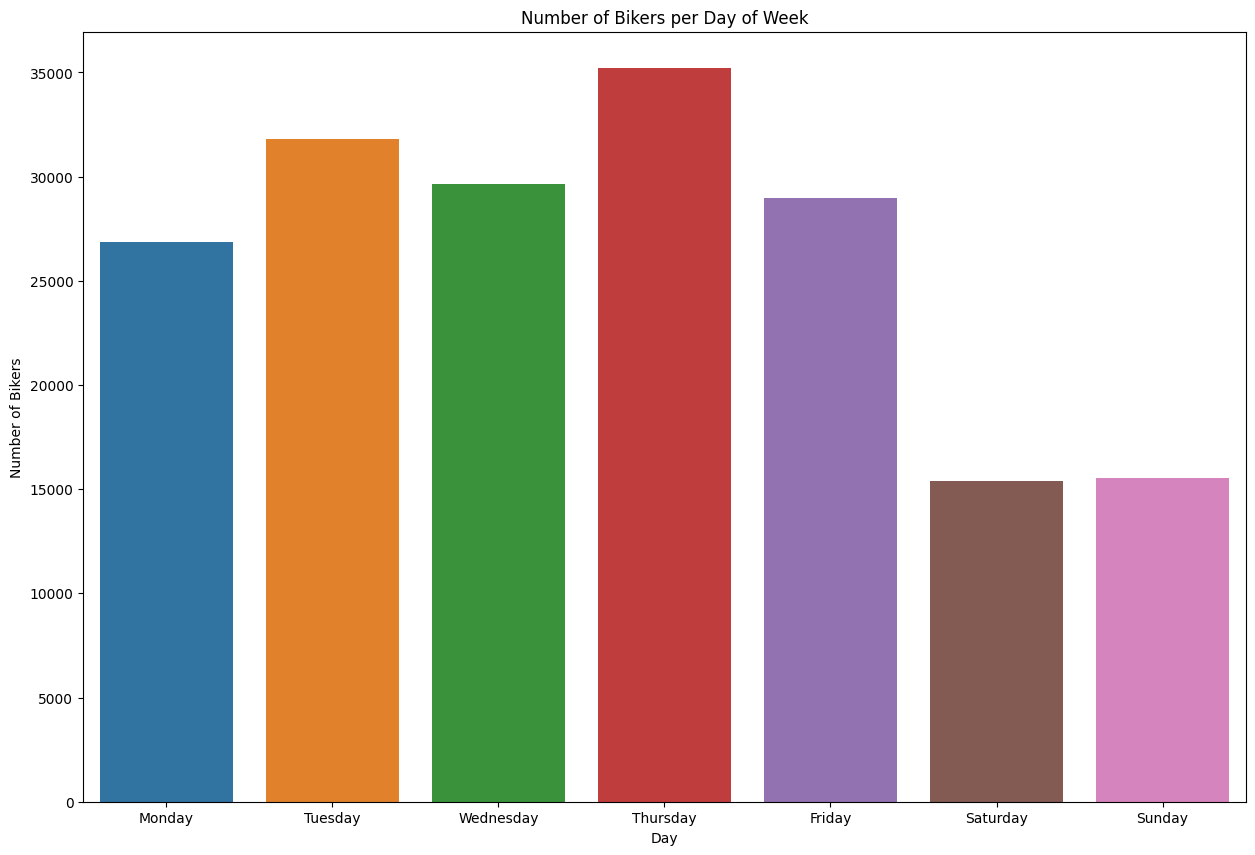

In [17]:
#create loop for avoiding repitition
def x_y_t(xaxis, yaxis, title):
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)

#visualize number of bikers per day of week
plt.figure(figsize=(15,10))
sns.countplot(data=ford_gobike, x='start_dayofweek')
x_y_t('Day', 'Number of Bikers', 'Number of Bikers per Day of Week')

The chart show that Bikers ride often in weekdays than weekends



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [18]:
ford_gobike['start_day'] = ford_gobike['start_time'].dt.day

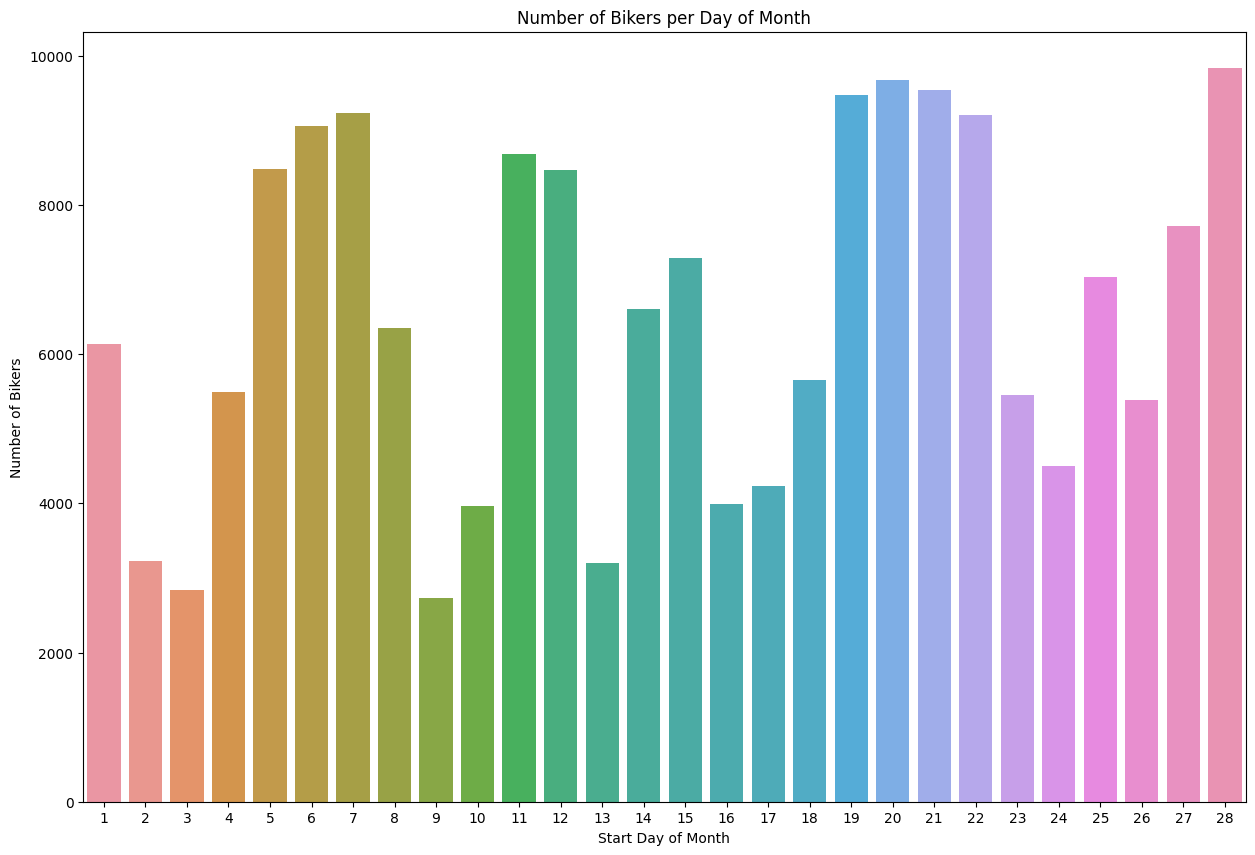

In [19]:
#visualize number of bikers per day of month
plt.figure(figsize=(15,10))
sns.countplot(data=ford_gobike, x='start_day')
x_y_t('Start Day of Month', 'Number of Bikers', 'Number of Bikers per Day of Month')

Not showing valuable insight from this chart

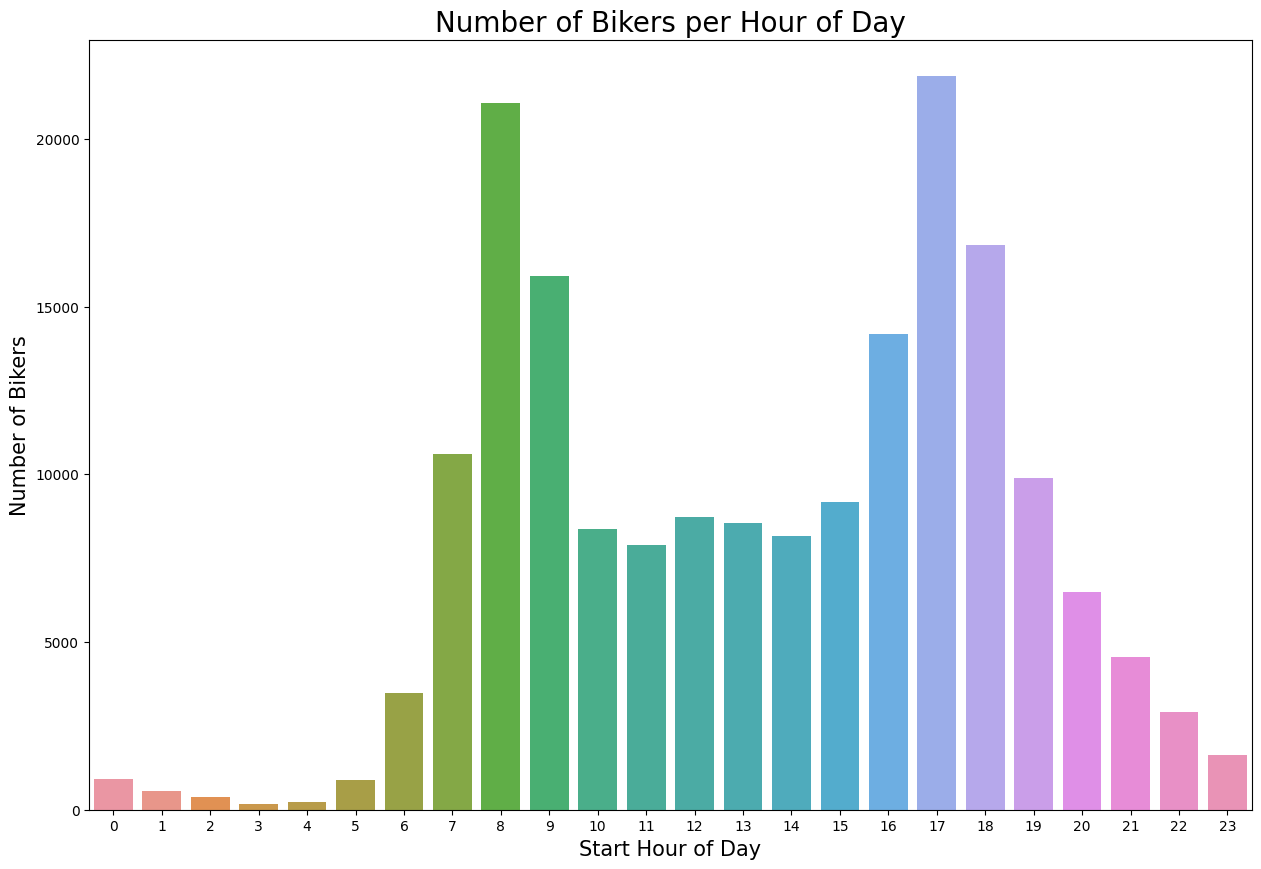

In [21]:
#number of bikers per hour of day
plt.figure(figsize=(15,10))
sns.countplot(data=ford_gobike, x='start_hourofday')
plt.xlabel('Start Hour of Day', size=15)
plt.ylabel('Number of Bikers', size=15)
plt.title('Number of Bikers per Hour of Day', size=20)
plt.show()

Bikers often start at 8am and 5pm in a day. From 9pm-6pm, not many bikers ride at this time

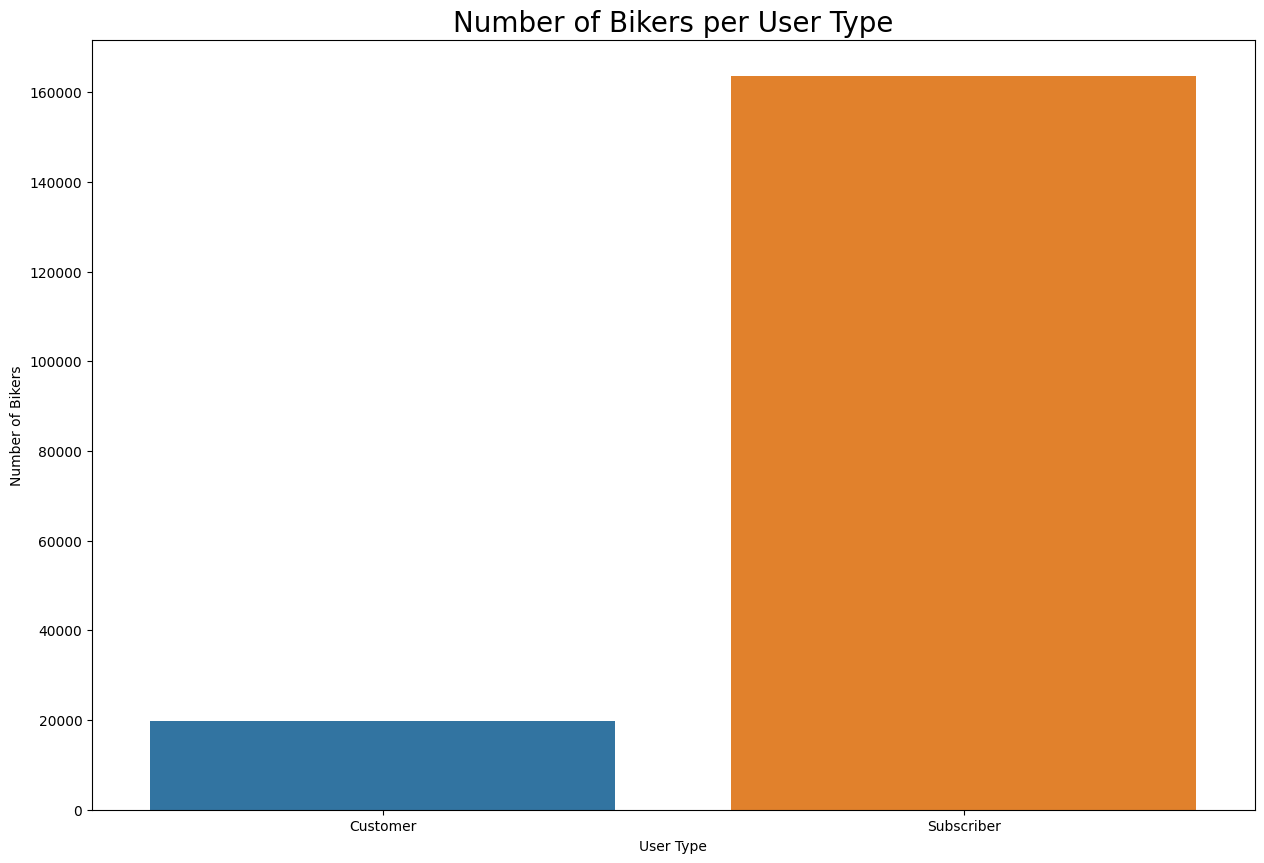

In [22]:
#number of bikers per user type
plt.figure(figsize=(15,10))
sns.countplot(data=ford_gobike, x='user_type')
plt.xlabel('User Type')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per User Type', size=20)
plt.show()

Number of Subcriber is a lot higher than number of Customer

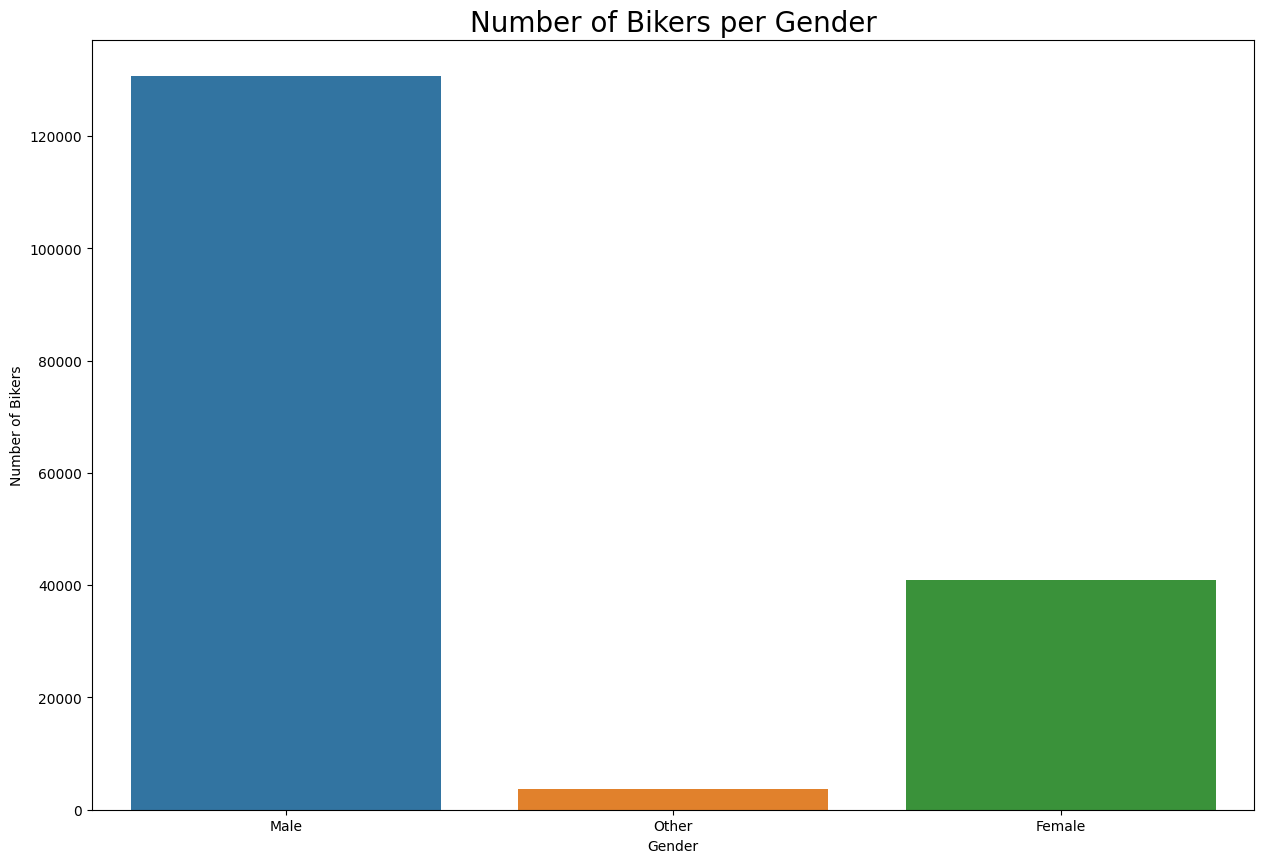

In [24]:
# number of bikers per gender
plt.figure(figsize=(15,10))
sns.countplot(data=ford_gobike, x='member_gender')
plt.xlabel('Gender')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per Gender', size=20)
plt.show()

Number of Male bikers is a lot higher than number of Female bikers and Other gender

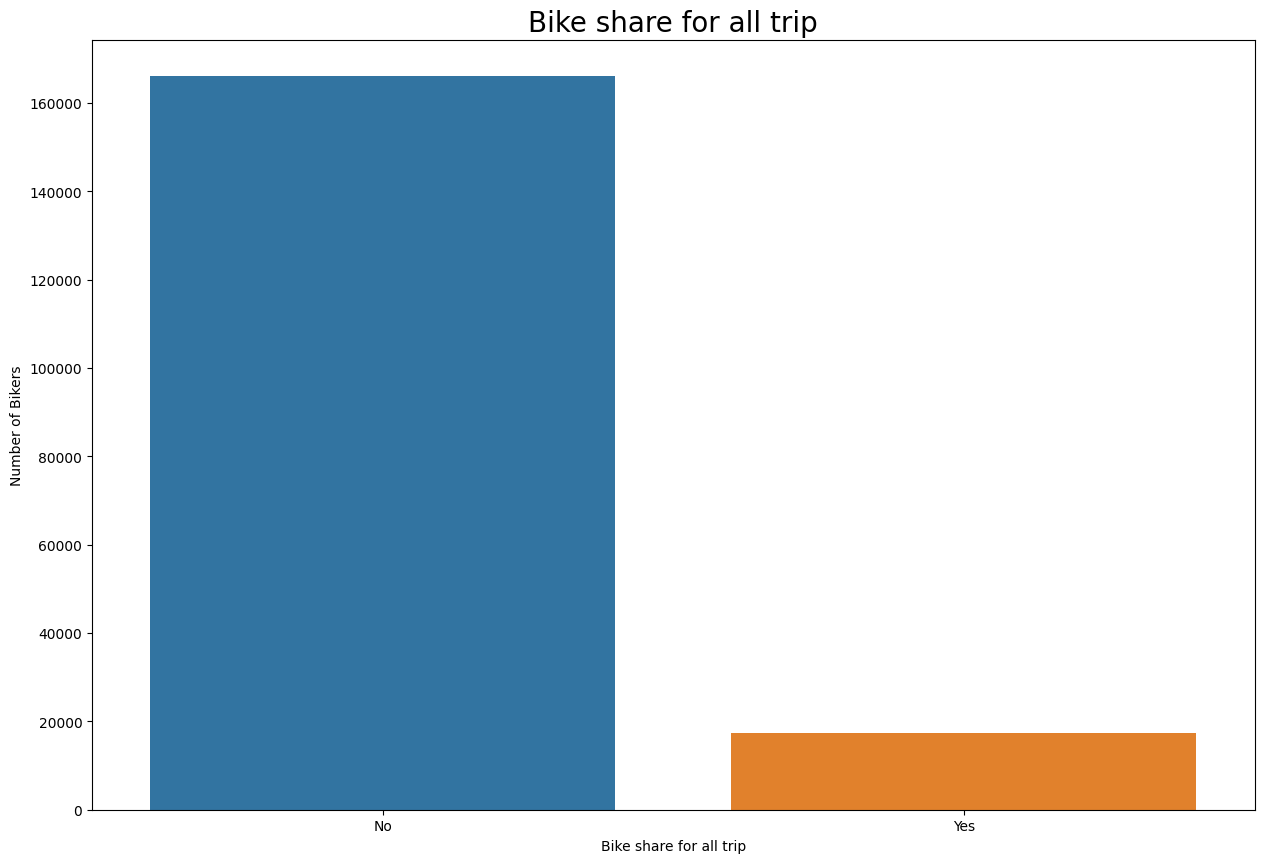

In [25]:
#bike share for all trip
plt.figure(figsize=(15,10))
sns.countplot(data=ford_gobike, x='bike_share_for_all_trip')
plt.xlabel('Bike share for all trip')
plt.ylabel('Number of Bikers')
plt.title('Bike share for all trip', size=20)
plt.show()

Number of bikers who not share for all trip is much higher

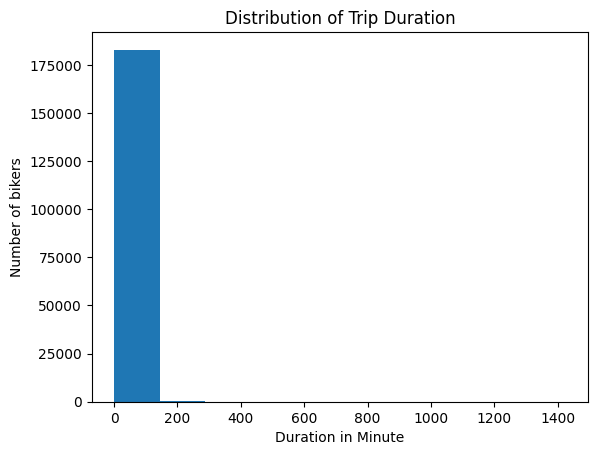

In [26]:
# distribution of trip duration
plt.hist(data=ford_gobike, x='duration_min')
plt.xlabel('Duration in Minute')
plt.ylabel('Number of bikers')
plt.title('Distribution of Trip Duration')
plt.show()

The distribution of trip duration seem like most of trip are lower than 150 minutes

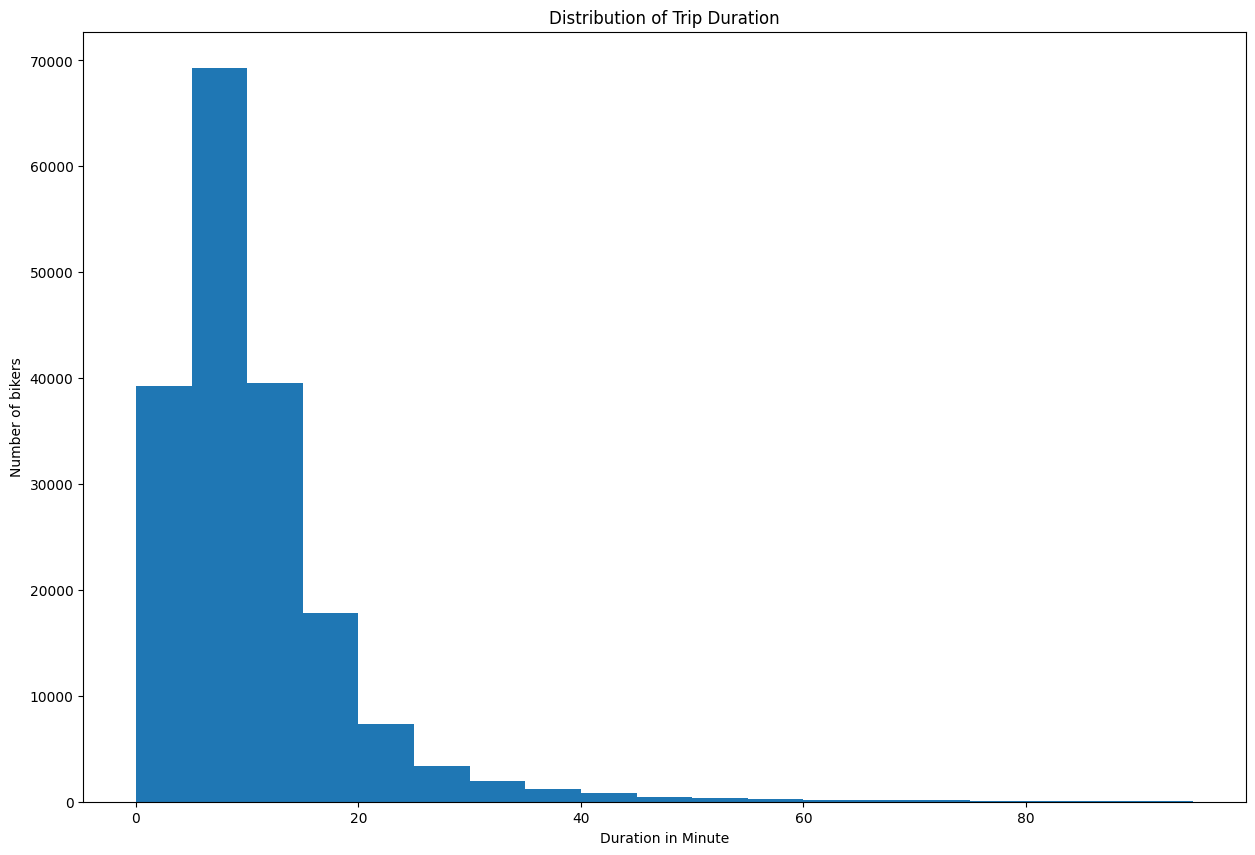

In [27]:
#replotting distribution of trip duration
plt.figure(figsize=(15,10))
group = np.arange(0, 100,5)
plt.hist(data=ford_gobike, x='duration_min', bins=group)
plt.xlabel('Duration in Minute')
plt.ylabel('Number of bikers')
plt.title('Distribution of Trip Duration')
plt.show()

The duration of bikers is most between 5 to 10 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are more bikers on weekdays compared to weekends, and number of bikers reached highest at 8 am and 5 pm in a day

Number of male bikers are higher than number of female.

Number of subscribers are  higher than customers. Most of bikers did not use bike share for all of their trips

The duration of bikers is most between 5 to 10 minutes

There were no unusual points and I didn't need to perform any transform

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Distribution of trip duration isn't seem normal at the first plotting, but then I zoom in smaller range where trip duration fell most, now the distribution is clearer

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

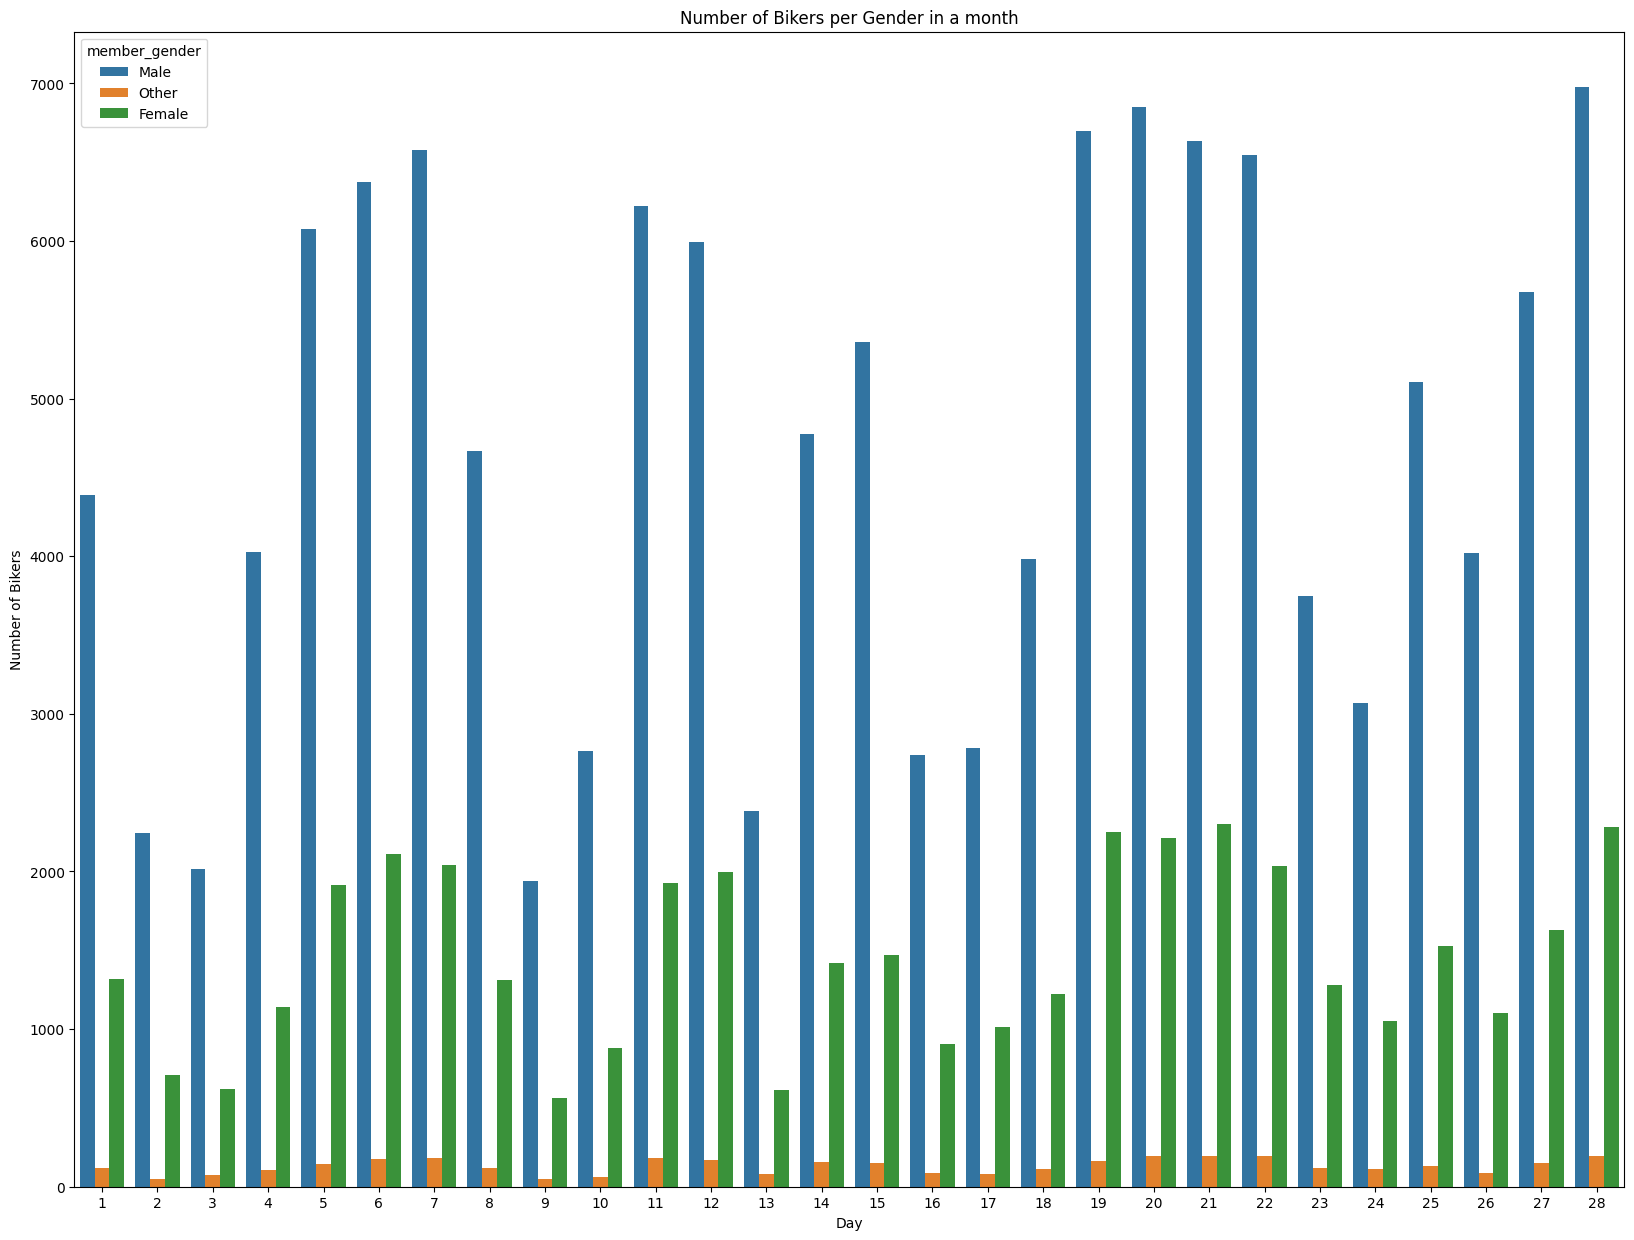

In [28]:
#Number of Bikers per Gender in a month

plt.figure(figsize=(20,15))
sns.countplot(data=ford_gobike, x='start_day', hue='member_gender')
plt.xlabel('Day')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per Gender in a month')
plt.show()

Not showing much insight from this chart

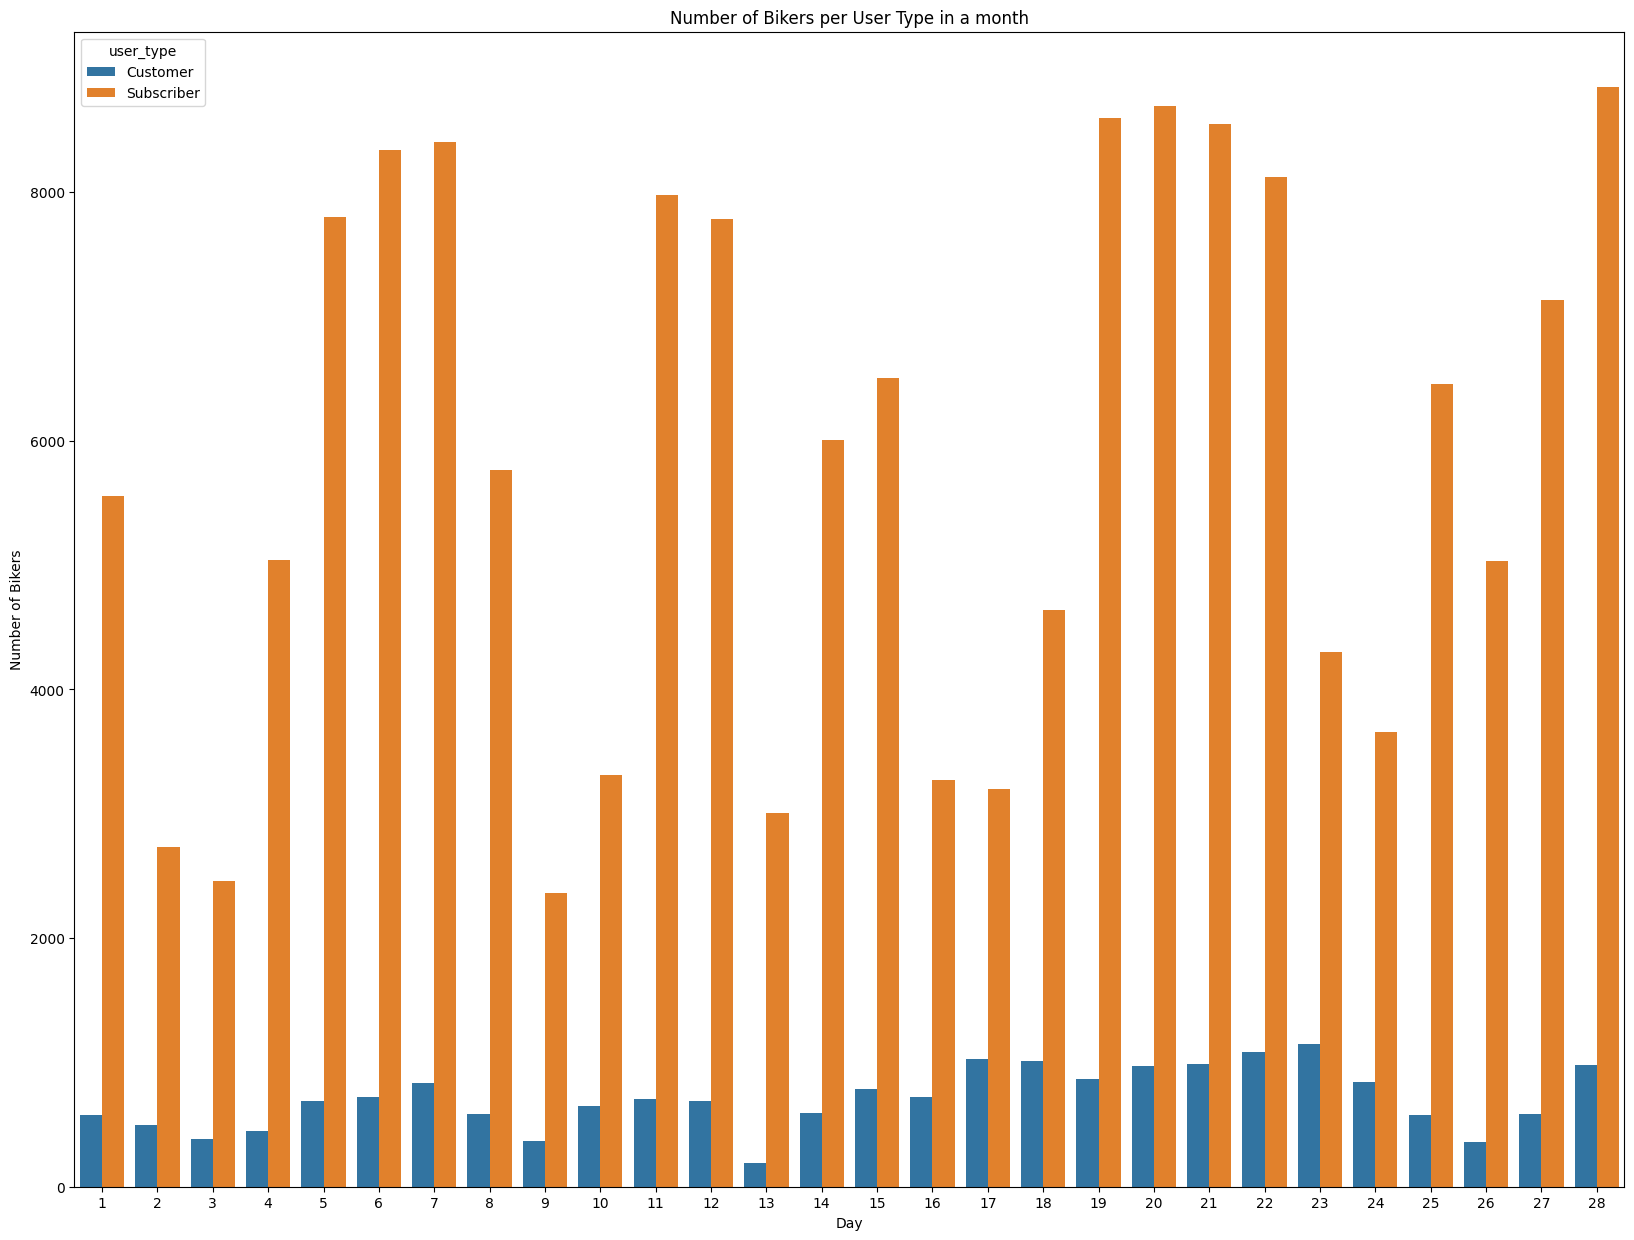

In [29]:
# Number of Bikers per User Type in a month
plt.figure(figsize=(20,15))
sns.countplot(data=ford_gobike, x='start_day', hue='user_type')
plt.xlabel('Day')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per User Type in a month')
plt.show()

Not showing much insight from this chart

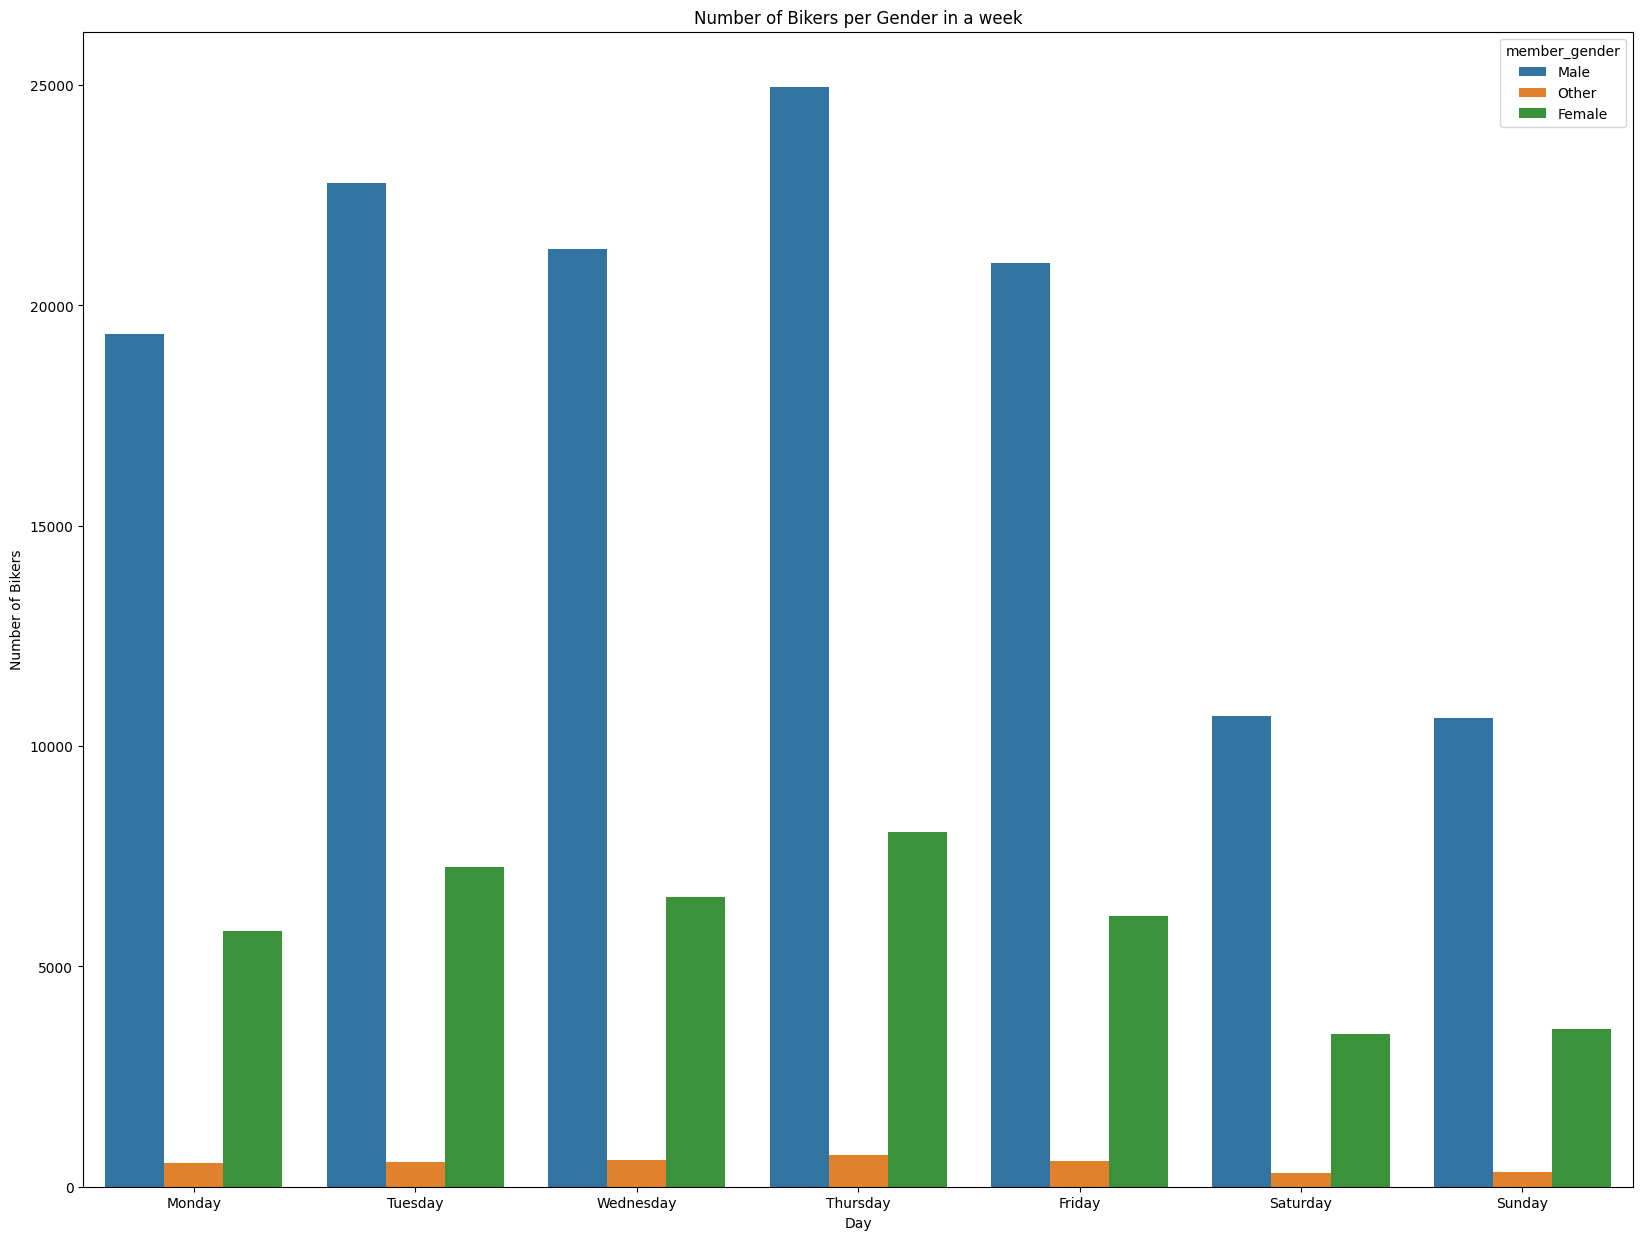

In [30]:
#Number of Bikers per Gender in a week
plt.figure(figsize=(20,15))
sns.countplot(data=ford_gobike, x='start_dayofweek', hue='member_gender')
plt.xlabel('Day')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per Gender in a week')
plt.show()

All gender seem like often ride bikes on weekdays

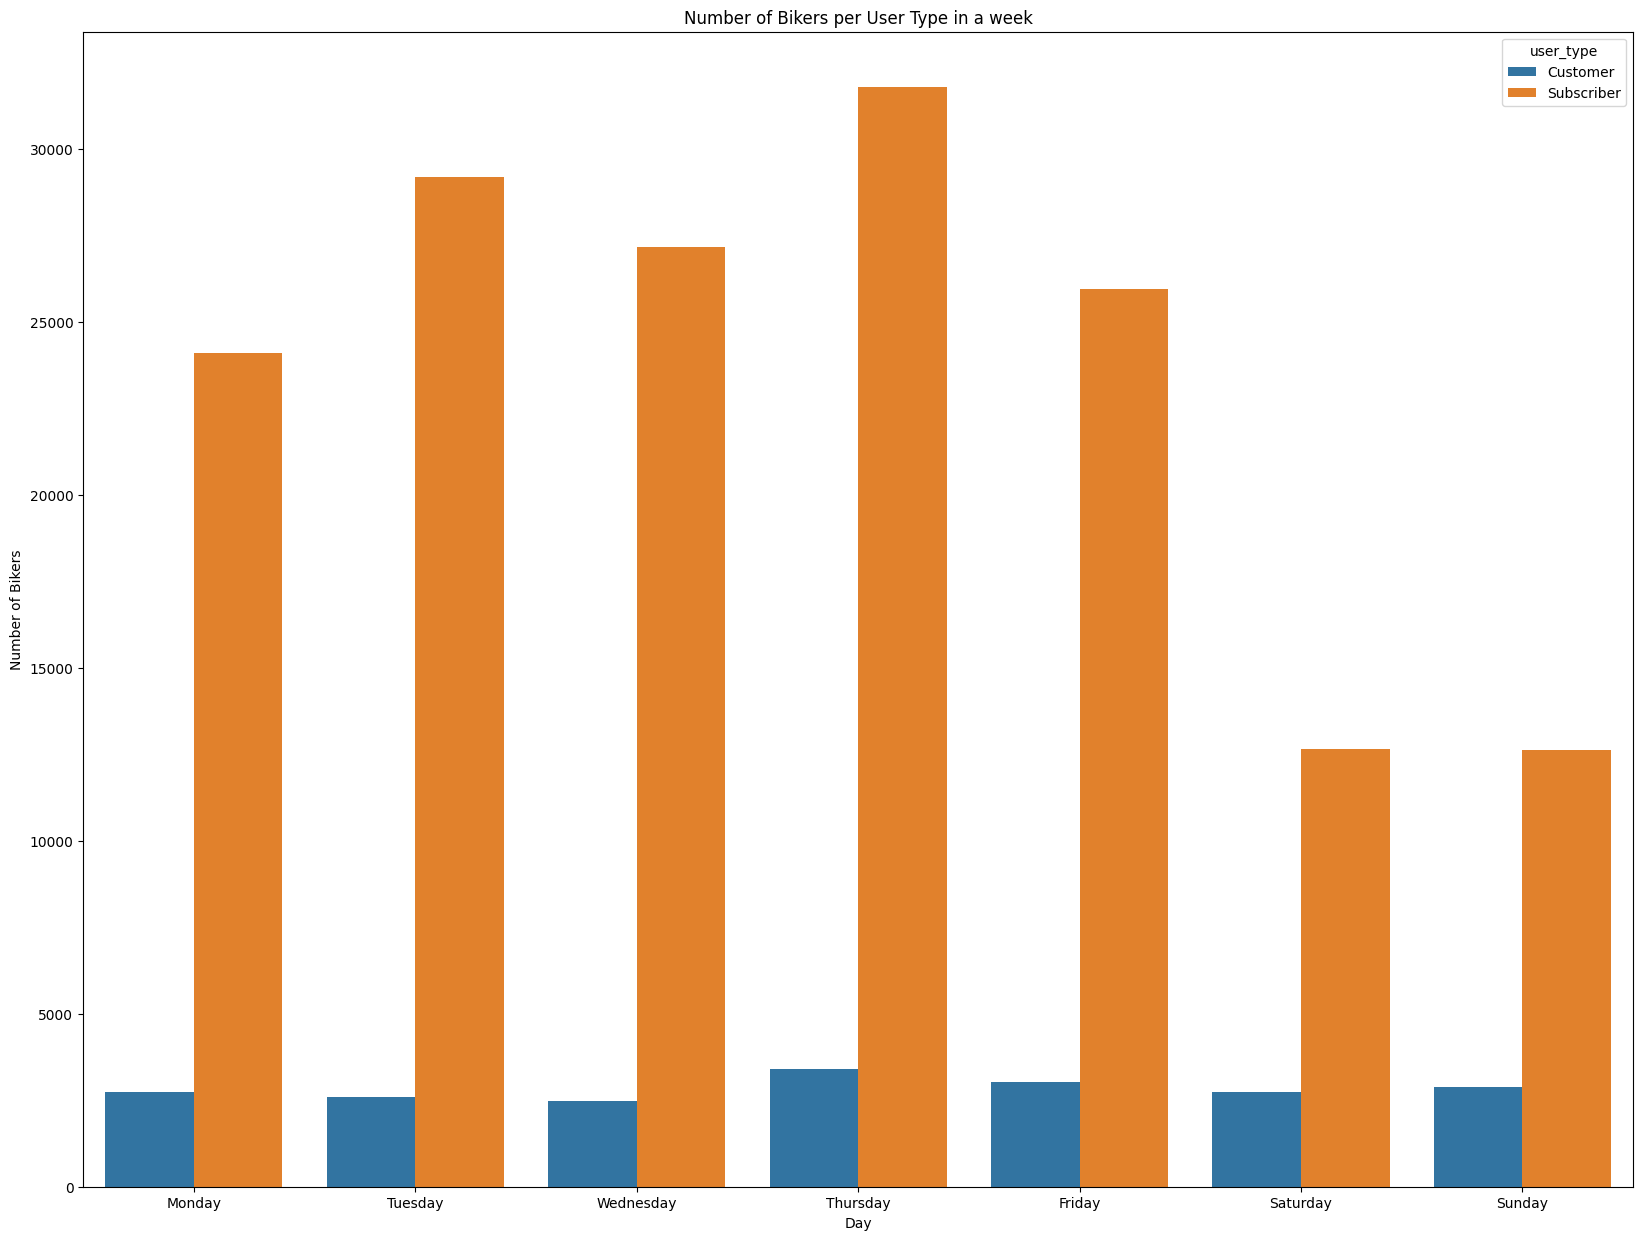

In [31]:
#Number of Bikers per User Type in a week
plt.figure(figsize=(20,15))
sns.countplot(data=ford_gobike, x='start_dayofweek', hue='user_type')
plt.xlabel('Day')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per User Type in a week')
plt.show()

The Subcriber has the highest number of trips on weekdays. Unlike Customer have almost the same number of trips both on weekdays and weekend

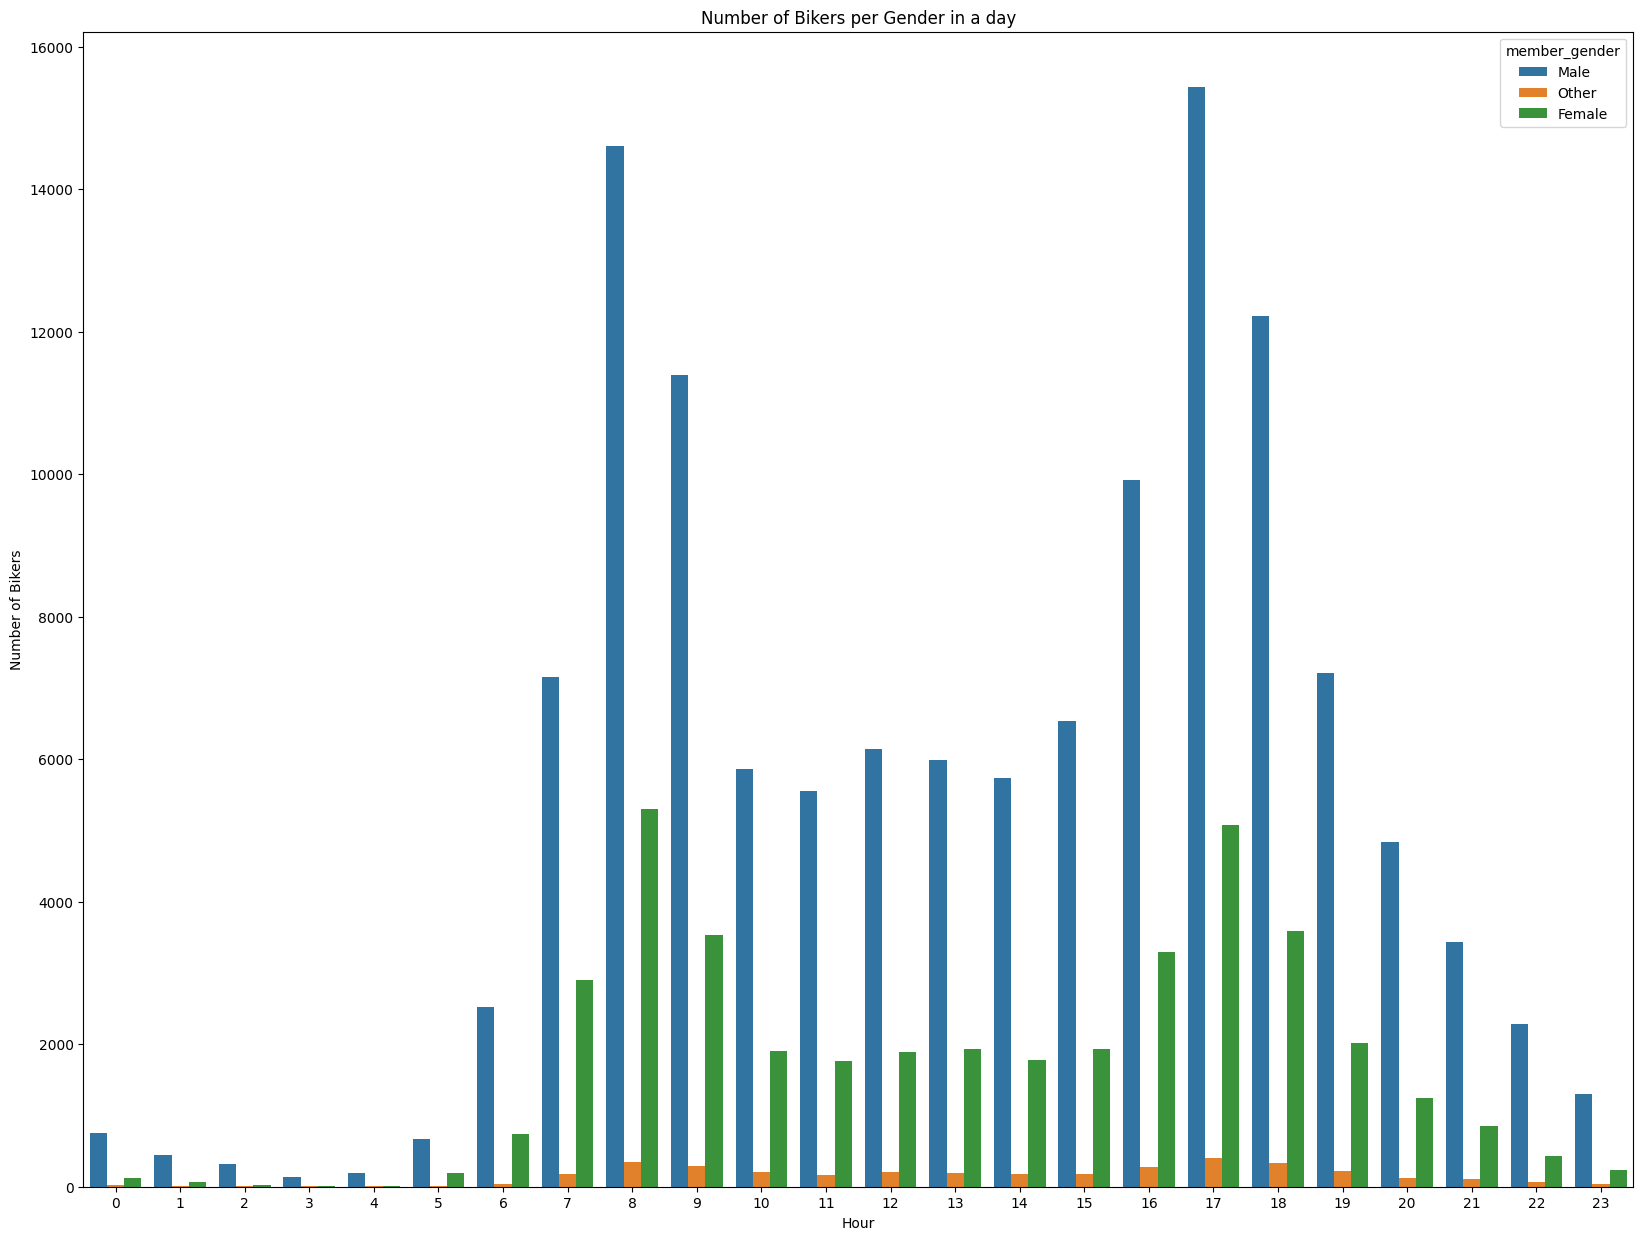

In [32]:
#Number of Bikers per Gender in a day
plt.figure(figsize=(20,15))
sns.countplot(data=ford_gobike, x='start_hourofday', hue='member_gender')
plt.xlabel('Hour')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per Gender in a day')
plt.show()

Female and Male bikers often ride at 8am and 5pm, but other gender ride same same from 7am to 9pm 

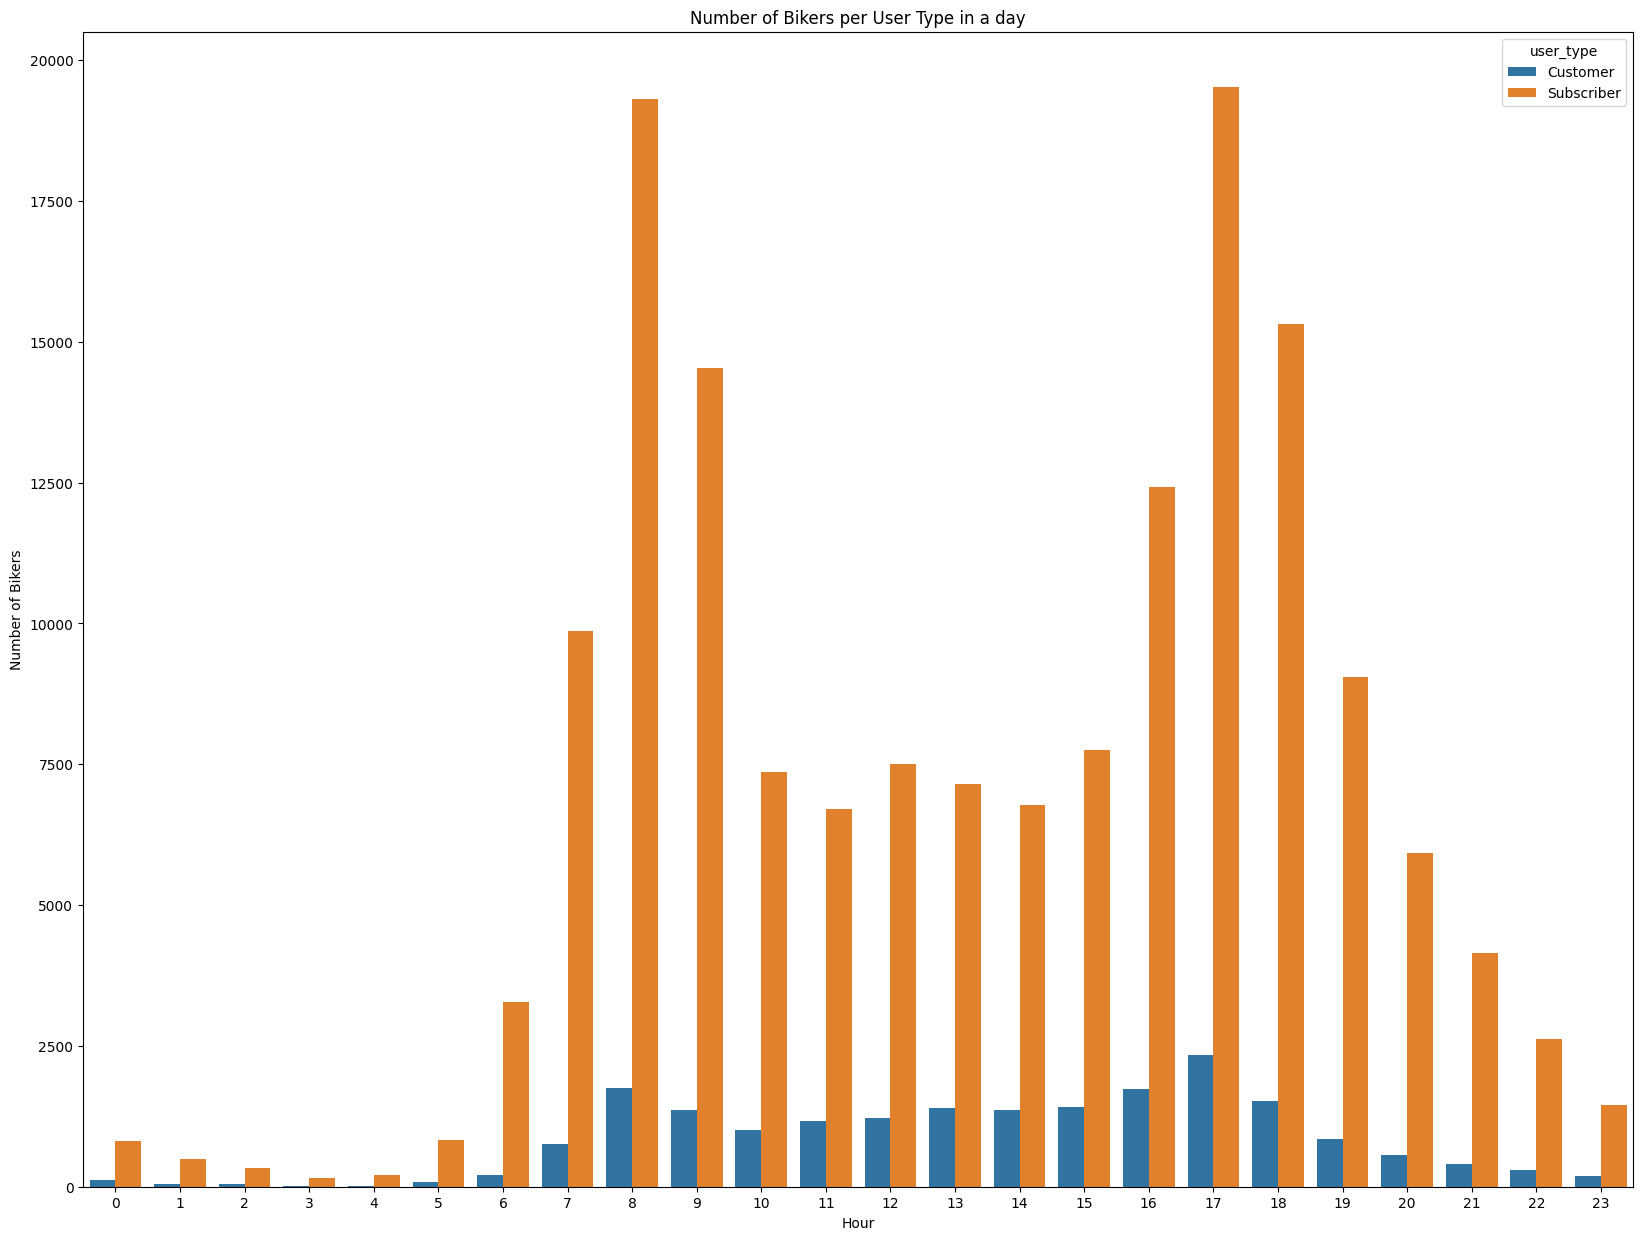

In [33]:
#Number of Bikers per User Type in a day
plt.figure(figsize=(20,15))
sns.countplot(data=ford_gobike, x='start_hourofday', hue='user_type')
plt.xlabel('Hour')
plt.ylabel('Number of Bikers')
plt.title('Number of Bikers per User Type in a day')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Based on user type we can see the different.
- The Subcriber has the highest number of trips on weekdays. 
- Unlike Customer have almost the same number of trips both on weekdays and weekend

Based on gender we can see a different.
- Female bikers rarely ride between 0-5am.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I didn't observe any intersting relationships between the other features

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

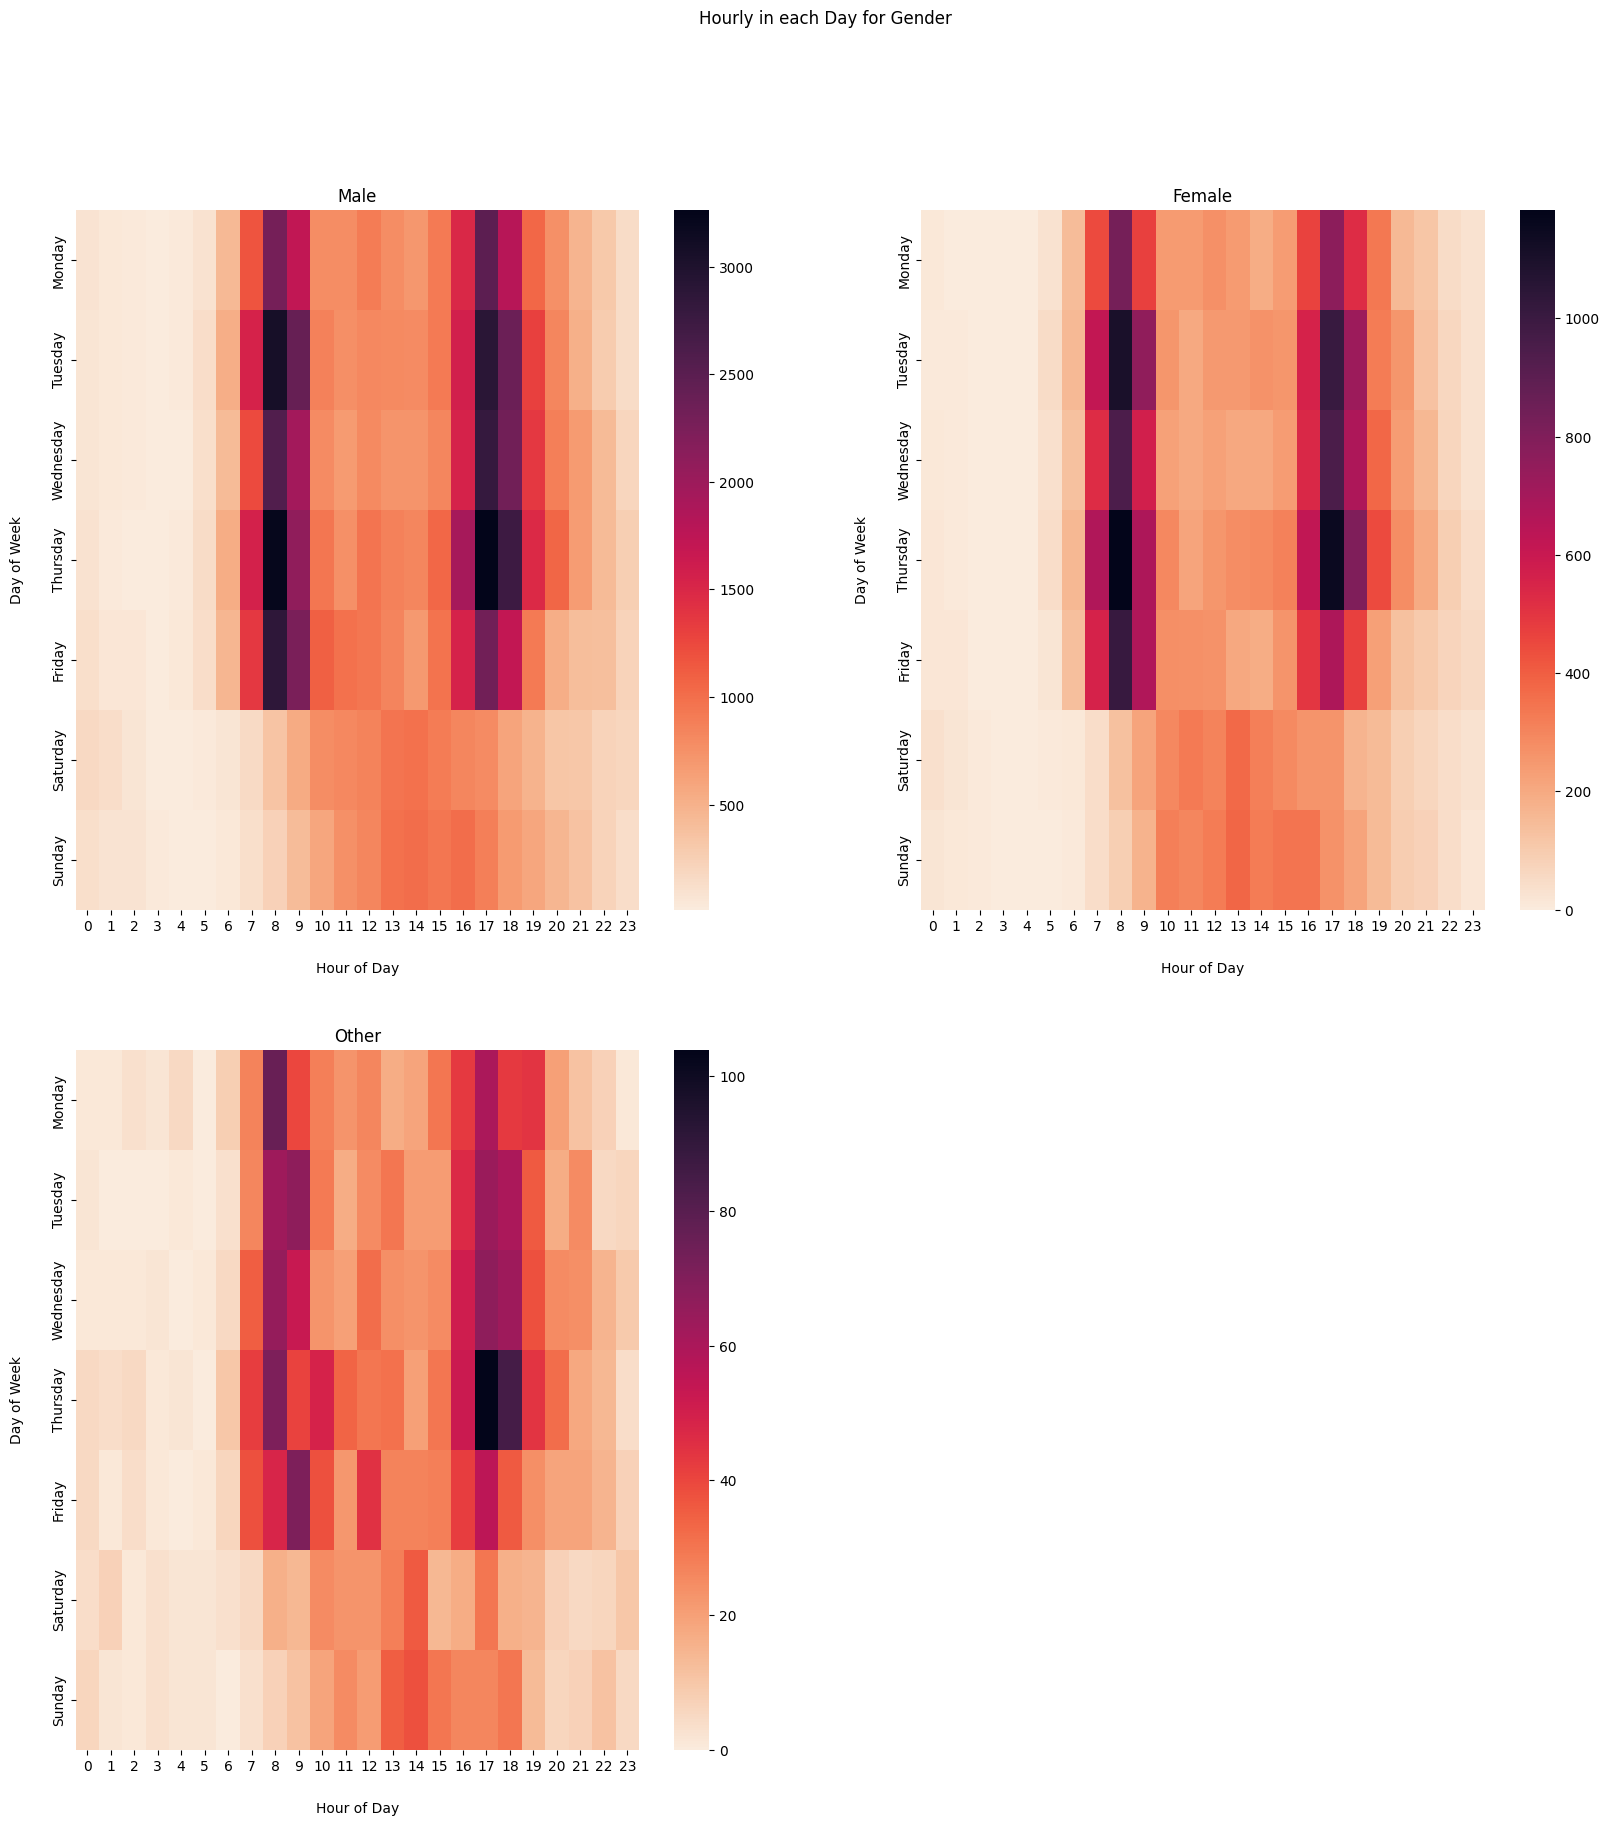

In [34]:
#dimension for the chart
plt.figure(figsize=(20,20))
plt.suptitle('Hourly in each Day for Gender')

#visualize first plot about male 
plt.subplot(221)
male = ford_gobike.query('member_gender == "Male"')
male_ = (male.groupby(['start_dayofweek', 'start_hourofday']).size()).reset_index(name='count')
sns.heatmap(male_.pivot(index='start_dayofweek', columns='start_hourofday', values='count'), cmap='rocket_r')
plt.title('Male', loc='center')
plt.xlabel('Hour of Day', labelpad=20)
plt.ylabel('Day of Week', labelpad=20)

#visualize second plot about female
plt.subplot(222)
female = ford_gobike.query('member_gender == "Female"')
female_ = (female.groupby(['start_dayofweek', 'start_hourofday']).size()).reset_index(name='count')
sns.heatmap(female_.pivot(index='start_dayofweek', columns='start_hourofday', values='count'), cmap='rocket_r')
plt.title('Female', loc='center')
plt.xlabel('Hour of Day', labelpad=20)
plt.ylabel('Day of Week', labelpad=20)

#visualize third plot about other gender
plt.subplot(223)
other = ford_gobike.query('member_gender == "Other"')
other_ = (other.groupby(['start_dayofweek', 'start_hourofday']).size()).reset_index(name='count')
sns.heatmap(other_.pivot(index='start_dayofweek', columns='start_hourofday', values='count'), cmap='rocket_r')
plt.title('Other', loc='center')
plt.xlabel('Hour of Day', labelpad=20)
plt.ylabel('Day of Week', labelpad=20)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In weekdays, Male and Female are similar because there're a lot of male bikers and female bikers ride at 8am from Tuesday - Friday and at 5pm from Tuesday - Thursday. Other gender ride bike the most in 5pm of Thursday. But in other, in weekends, all of gender don't ride bike much. And in everyday, from 0-5am, there are not many bikers in all of gender

### Were there any interesting or surprising interactions between features?

> In weekends, all of gender don't ride bike much

## Conclusions

There are more bikers on weekdays compared to weekends, and number of bikers reached highest at 8 am and 5 pm in a day

Number of male bikers are higher than number of female.

Number of subscribers are  higher than customers. 

Most of bikers did not use bike share for all of their trips

The duration of bikers is most between 5 to 10 minutes

There were no unusual points and I didn't need to perform any transform

In weekdays, Male and Female are similar because there're a lot of male bikers and female bikers ride at 8am from Tuesday - Friday and at 5pm from Tuesday - Thursday. 

Other gender ride bike the most in 5pm of Thursday. 

But in other, in weekends, all of gender don't ride bike much. 

And in everyday, from 0-5am, there are not many bikers in all of gender